## Problem4

RPL Banking and Financing company wants to study the behavior patterns of their customers so that they can efficiently provide their services and solve the problem of churn. They have historical data of their customers. Build an Artificial Neural Network with Exited as the target variable.

In [3]:
# Import necessary libraries for MLP and reshaping the data structres
import numpy as np
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
# from keras.layers import Dropout,Flatten
from keras.utils import np_utils

np.random.seed(10)


In [4]:
import pandas as pd
data = pd.read_csv("RPL.csv")

In [7]:
data.shape

(10000, 14)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data.Surname.nunique()

2932

In [10]:
data.Geography.nunique()

3

In [11]:
data.Gender.nunique()

2

In [12]:
# Label encode categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Surname'] = encoder.fit_transform(data['Surname'])
data['Geography'] = encoder.fit_transform(data['Geography'])
data['Gender'] = encoder.fit_transform(data['Gender'])

In [13]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [22]:
data.drop(columns=['RowNumber','CustomerId'],inplace=True)

In [76]:
data.drop(columns=['Surname'],inplace=True)

In [77]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [78]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [79]:
data.var()

CreditScore        9.341860e+03
Geography          6.848048e-01
Gender             2.479363e-01
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

In [80]:
data.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [81]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [82]:
data.iloc[:,:-1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [83]:
data.iloc[:,-1]

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(data.iloc[:,:-1])

In [31]:
print(X[:5, :])

[[0.38041624 0.538      0.         0.         0.32432432 0.2
  0.         0.         1.         1.         0.50673489]
 [0.40156943 0.516      1.         0.         0.31081081 0.1
  0.33403148 0.         0.         1.         0.56270874]
 [0.69600819 0.304      0.         0.         0.32432432 0.8
  0.63635718 0.66666667 1.         0.         0.56965435]
 [0.09860116 0.698      0.         0.         0.28378378 0.1
  0.         0.33333333 0.         0.         0.46912005]
 [0.62163084 1.         1.         0.         0.33783784 0.2
  0.50024622 0.         1.         1.         0.39540036]]


In [85]:
y=data.iloc[:,-1]

In [86]:
# Separating the data set into 2 parts - all the inputs and label columns
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# summarize first 5 rows
print(X_train[:5, :])

[[0.556      0.5        1.         0.14864865 0.3        0.45096788
  0.33333333 0.         1.         0.62374707]
 [0.552      0.         0.         0.14864865 0.4        0.42155474
  0.33333333 0.         0.         0.20548582]
 [0.524      0.5        0.         0.39189189 0.6        0.51823778
  0.         1.         1.         0.22871499]
 [0.592      0.5        0.         0.45945946 0.6        0.44535771
  0.33333333 0.         1.         0.34181064]
 [0.728      1.         1.         0.2027027  0.8        0.48632172
  0.         0.         0.         0.81259555]]


In [87]:
y_train.shape


(8000,)

In [88]:
X_test.shape


(2000, 10)

In [89]:
y_test.shape

(2000,)

In [110]:
hidden_units1 = 200
hidden_units2 = 480
hidden_units3 = 156
hidden_units4 = 60
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def design_mlp():
    model = Sequential([
    Dense(hidden_units1, kernel_initializer='uniform', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='uniform', activation='relu'),
    Dropout(0.2),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
    ])
    return model

In [111]:
# building a cnn model using train data set and validating on test data set
model = design_mlp()

# fitting model on train data
#model.fit(x=X_train,y=y_train,batch_size=5,epochs=500,verbose = 1)


In [112]:
 model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [113]:
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=1000
)

Epoch 1/100
8/8 [==============================] - 2s 23ms/step - loss: 0.6665 - accuracy: 0.7108
Epoch 2/100
8/8 [==============================] - 0s 24ms/step - loss: 0.5349 - accuracy: 0.8009
Epoch 3/100
8/8 [==============================] - 0s 24ms/step - loss: 0.5171 - accuracy: 0.7966
Epoch 4/100
8/8 [==============================] - 0s 24ms/step - loss: 0.4959 - accuracy: 0.7958
Epoch 5/100
8/8 [==============================] - 0s 25ms/step - loss: 0.4861 - accuracy: 0.8012
Epoch 6/100
8/8 [==============================] - 0s 24ms/step - loss: 0.4848 - accuracy: 0.7956
Epoch 7/100
8/8 [==============================] - 0s 25ms/step - loss: 0.4795 - accuracy: 0.7945
Epoch 8/100
8/8 [==============================] - 0s 24ms/step - loss: 0.4680 - accuracy: 0.7957
Epoch 9/100
8/8 [==============================] - 0s 26ms/step - loss: 0.4596 - accuracy: 0.7987
Epoch 10/100
8/8 [==============================] - 0s 27ms/step - loss: 0.4591 - accuracy: 0.7978
Epoch 11/100
8/8 [=

8/8 [==============================] - 0s 32ms/step - loss: 0.3314 - accuracy: 0.8638
Epoch 84/100
8/8 [==============================] - 0s 30ms/step - loss: 0.3399 - accuracy: 0.8625
Epoch 85/100
8/8 [==============================] - 0s 32ms/step - loss: 0.3364 - accuracy: 0.8639
Epoch 86/100
8/8 [==============================] - 0s 30ms/step - loss: 0.3380 - accuracy: 0.8577
Epoch 87/100
8/8 [==============================] - 0s 29ms/step - loss: 0.3326 - accuracy: 0.8624
Epoch 88/100
8/8 [==============================] - 0s 28ms/step - loss: 0.3323 - accuracy: 0.8642
Epoch 89/100
8/8 [==============================] - 0s 31ms/step - loss: 0.3422 - accuracy: 0.8573
Epoch 90/100
8/8 [==============================] - 0s 30ms/step - loss: 0.3318 - accuracy: 0.8618
Epoch 91/100
8/8 [==============================] - 0s 30ms/step - loss: 0.3472 - accuracy: 0.8550
Epoch 92/100
8/8 [==============================] - 0s 34ms/step - loss: 0.3388 - accuracy: 0.8613
Epoch 93/100
8/8 [=====

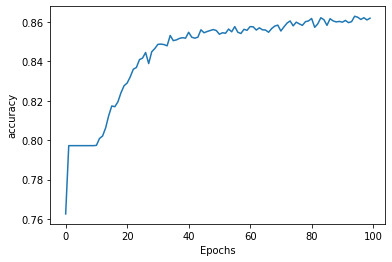

In [114]:
import matplotlib.pyplot as plt
def plot_history(history, key):
    plt.plot(history.history[key])
    #plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    #plt.legend([key, 'val_'+key])
    plt.show()
# Plot the history
plot_history(history, 'accuracy')

In [118]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

Text(0.5, 15.0, 'Predicted label')

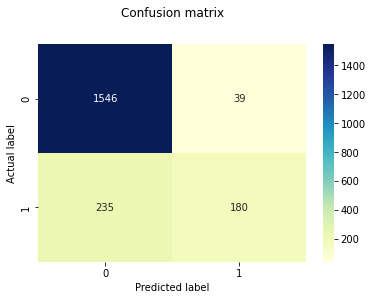

In [119]:
import seaborn as sns

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [120]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1585
           1       0.82      0.43      0.57       415

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


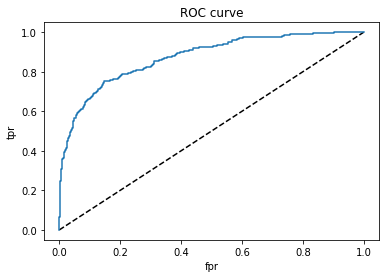

In [122]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [123]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.87379423054996